#### User-specified parameters

In [2]:
python_material_folder_name = "python-material-INSTRUCTOR"

#### Import libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# Check if in Google Colab environment
try:
    from google.colab import drive
    # Mount drive
    drive.mount('/content/drive')
    # Set up path to Python material parent folder
    path_python_material = rf"drive/MyDrive/{python_material_folder_name}"
        # If unsure, print current directory path by executing the following in a new cell:
        # !pwd
    IN_COLAB = True
except:
    IN_COLAB = False
    # If working locally on Jupyter Notebook, parent folder is one folder up (assuming you are using the folder structure shared at the beginning of the course)
    path_python_material = ".."

1\. Data Collection 
----------------------------------------

In [6]:
# Load the dataset
df = pd.read_csv(rf"{path_python_material}/data/1-raw/lending-club-2007-2020Q3/Loan_status_2007-2020Q3-100ksample.csv")

# Display the first few rows of the dataset
df.head(5)

,Unnamed: 0.1,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1746494,25450,167338079,4000,4000,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-20,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1,Dec-04,665,669,0,19.0,110.0,4,1,1988,82.80%,12,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-20,134.93,Jun-20,May-20,669,665,1.0,NaN,1,Individual,NaN,NaN,NaN,0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2370717,81861,71016917,24000,24000,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-16,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0,Jan-04,680,684,0,NaN,NaN,10,0,22697,64.50%,24,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-20,500.07,Jun-20,May-20,704,700,0.0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2264870,397109,39589826,5000,5000,5000.0,36 months,10.49%,162.49,B,B3,driver,10+ years,MORTGAGE,55000.0,Not Verified,Jan-15,Fully Paid,n,https://lendingclub.com/

2\. Handling Missing values (Imputation and removal)
----------------------------------------


In [14]:
list_to_drop = ['Unnamed: 0.1', 'Unnamed: 0']
df_dropped = df.drop(list_to_drop, axis = 1)

In [16]:
print(f"df shape: {df.shape}")
print(f"df_dropped shape: {df_dropped.shape}")

df shape: (100000, 143)
df_dropped shape: (100000, 141)



### Basic data exploration and stats

In [18]:
# Number of rows and columns
df_dropped.shape

(100000, 141)

#### Numeric columns

In [21]:
# Descriptive statistics of the numeric columns
print("\nDescriptive Statistics:")
df_dropped.describe()


Descriptive Statistics:


,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,99898.000000,100000.00000,100000.000000,100000.000000,100000.000000,47186.000000,14630.000000,100000.000000,100000.00000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99994.000000,24602.000000,100000.0,7.166000e+03,7166.000000,100000.000000,97562.000000,9.756200e+04,70356.000000,70356.000000,70356.000000,70356.000000,68227.000000,70356.000000,60315.000000,70356.000000,70356.000000,70356.000000,70343.000000,9.756200e+04,70356.000000,70356.000000,70356.000000,98222.000000,97560.000000,97152.000000,97101.000000,99994.00000,100000.000000,94627.000000,97562.000000,97562.000000,97562.000000,98222.000000,97212.000000,21943.000000,87190.000000,31658.000000,97562.000000,97562.000000,97562.000000,97949.000000,97562.000000,97562.000000,97562.000000,97562.000000,97562.000000,97949.000000,94488.000000,97562.000000,97562.000000,97562.000000,97558.000000,97133.000000,99955.000000,99995.000000,9.756200e+04,9.822200e+04,98222.000000,9.756200e+04,6739.000000,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,6613.000000,6740.000000,6740.000000,6740.000000,6740.000000,4895.000000,6222.000000,4895.000000,4895.000000,6127.000000,6222.000000,6222.000000
mean,9.789485e+07,15332.373000,15328.216250,15313.244829,451.708510,8.002918e+04,19.332252,0.28473,700.639200,704.639440,0.554310,35.034269,74.945113,11.688690,0.17770,1.689349e+04,24.040390,4032.024853,4031.436341,12559.494957,12544.530188,9911.414064,2479.307829,1.750509,167.022522,28.605125,3512.909843,690.476220,677.660400,0.017651,44.633322,1.0,1.295764e+05,19.408330,0.003460,208.056907,1.459264e+05,0.928037,2.839175,0.703906,1.616351,20.323259,36927.159276,68.988842,1.250881,2.645076,5999.964339,56.154116,3.639794e+04,1.075232,1.517497,1.998707,4.512166,13757.234143,12779.260859,55.838138,0.00821,10.706750,125.750589,179.950237,14.462444,8.325342,1.507839,25.101726,39.344392,7.094151,36.186525,0.483631,3.702671,5.594074,4.858508,7.635350,8.558486,8.266138,13.785039,5.550563,11.699834,0.000445,0.002306,0.075306,2.080523,94.356537,4

#### Categorical columns

In [23]:
print("\nNumber of unique values in each column:")
df_dropped.nunique()


Number of unique values in each column:


id                                            100000
loan_amnt                                       1479
funded_amnt                                     1479
funded_amnt_inv                                 1793
term                                               2
int_rate                                         584
installment                                    28510
grade                                              7
sub_grade                                         35
emp_title                                      40094
emp_length                                        11
home_ownership                                     6
annual_inc                                      8852
verification_status                                3
issue_d                                          159
loan_status                                       10
pymnt_plan                                         1
url                                           100000
purpose                                       

In [26]:
df_dropped.loan_status.value_counts()

loan_status
Fully Paid                                             51189
Current                                                35294
Charged Off                                            12384
Late (31-120 days)                                       535
In Grace Period                                          329
Late (16-30 days)                                         90
Does not meet the credit policy. Status:Fully Paid        69
Issued                                                    63
Does not meet the credit policy. Status:Charged Off       33
Default                                                   14
Name: count, dtype: int64

In [28]:
# Step 1 - Filter on charged off records based on df_dropped.loan_status == "Charged Off" condition
charged_off_loans = df_dropped[df_dropped.loan_status == "Charged Off"]

# Step 2 - Calculate average size of charged off loan
average_size_loan = charged_off_loans['loan_amnt'].mean()
print(f"""Average size of charged off loan:
         {
             average_size_loan
         }""")


Average size of charged off loan:
         15784.869589793281


In [30]:
# Tip: How to format your output?
formatted_average_size_loan = f"${average_size_loan:,.2f}"
formatted_average_size_loan

'$15,784.87'

In [32]:
# Let's apply to the entire dataframe

def format_dollar(amount):
    return f"${amount:,.2f}"

# Apply the function to the 'loan_amount' column for display purposes
df_dropped['loan_amount_formatted'] = df_dropped['loan_amnt'].apply(format_dollar)


In [36]:
df_dropped = df_dropped.drop(["loan_amount_formatted"], axis = 1)

In [38]:
# Checking for missing values
df_dropped.isnull().sum()


id                                                0
loan_amnt                                         0
funded_amnt                                       0
funded_amnt_inv                                   0
term                                              0
int_rate                                          0
installment                                       0
grade                                             0
sub_grade                                         0
emp_title                                      8954
emp_length                                     6950
home_ownership                                    0
annual_inc                                        0
verification_status                               0
issue_d                                           0
loan_status                                       0
pymnt_plan                                        0
url                                               0
purpose                                           0
title       

In [40]:
# Create hardship flag based on information provided by data SMEs in the business
df_dropped['hardship_status_filled'] = df_dropped['hardship_status'].fillna("NO_HARDSHIP")
print(f"Nulls after filling: {df_dropped['hardship_status_filled'].isnull().sum()}")
df_dropped[['hardship_status_filled', 'hardship_status']].head(2)

Nulls after filling: 0


,hardship_status_filled,hardship_status
0,NO_HARDSHIP,NaN
1,NO_HARDSHIP,NaN


In [42]:
# Imputation: Filling missing values with the mean for numerical columns
df_dropped['num_accts_ever_120_pd'].fillna(df_dropped['num_accts_ever_120_pd'].mean(), inplace=True)
print(f"Nulls after filling: {df_dropped['num_accts_ever_120_pd'].isnull().sum()}")


Nulls after filling: 0


C:\Users\acban\AppData\Local\Temp\ipykernel_21296\2369733154.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_dropped['num_accts_ever_120_pd'].fillna(df_dropped['num_accts_ever_120_pd'].mean(), inplace=True)


In [44]:
# Let's try this 'blanket' approach on our data and see what happens:
df_blanket_drop = df_dropped.dropna(axis=0, how='any')
df_blanket_drop.shape

(1, 142)

As expected, we ended up with very few/no records given the many 'holes' in our dataset. This is very common in practice for such large data sources (and so many features which are often sparsely populated), so if really wanted to use this approach, we may want to restrict dropping based on a subset of features being null.

In [46]:
# Let's try this 'blanket' approach on a subset of fields and see what happens:
df_blanket_drop2 = df_dropped.dropna(axis=0, how='any',subset=['mo_sin_rcnt_rev_tl_op', 'emp_title'])
df_blanket_drop2.shape

(88746, 142)

Alternatively, we can use the 'all' option to only drop records that are completely empty

In [48]:
# Let's try this option and see what happens:
df_blanket_drop3 = df_dropped.dropna(axis=0, how='all')
df_blanket_drop3.shape

(100000, 142)

4\. Removing duplicates
----------------------------------------

Duplicates can skew your analysis and should be removed to ensure data integrity.

In [50]:
# Checking for duplicate rows
duplicates = df_dropped.duplicated().sum()
duplicates

0

In [52]:
# Removing duplicate rows
df_deduped = df_dropped.drop_duplicates(inplace=True)

try:
    df_deduped.shape # Note: it will fail if empty (i.e. no duplicates)
except:
    print("No duplicates")

No duplicates


5\. Handling outliers
----------------------------------------


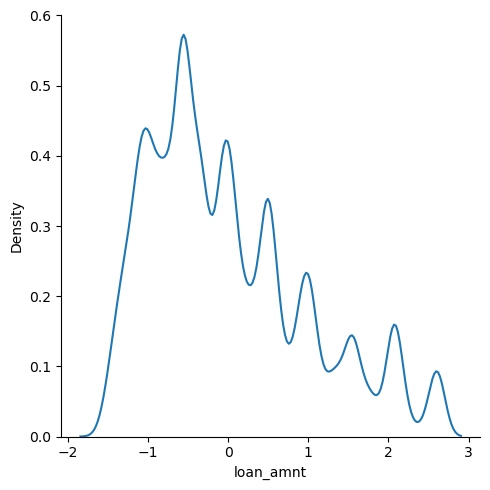

In [54]:
from scipy import stats
import numpy as np

# Calculating on a single column, e.g. loan amount
z_scores = stats.zscore(df_dropped["loan_amnt"])
sns.displot(z_scores, kind='kde')

In [ ]:
# Threshold = 3
for threshold in range(200, 301, 25):
    thresh = threshold/100
    print(f"Threshold == {thresh}, {df_dropped[np.abs(z_scores)>thresh].shape[0]} outliers ")

In [56]:
# Calculate Z-scores for numerical columns
z_scores = np.abs(stats.zscore(df_dropped.select_dtypes(include=[np.number])))

# Define a threshold for identifying outliers
threshold = 3

# How many outliers identified for each numerical columns?
gt_thresh = z_scores > threshold
outlier_volume = pd.DataFrame(gt_thresh.sum(), columns=["num_outliers"])
outlier_volume.sort_values(by = "num_outliers"
                          , ascending= False)

,num_outliers
last_pymnt_amnt,2707
out_prncp,2704
out_prncp_inv,2703
delinq_2yrs,2346
num_accts_ever_120_pd,2204
total_rec_int,2130
recoveries,2068
collection_recovery_fee,1982
pub_rec,1807
last_fico_range_low,1790


In [58]:
lpa_outliers = df_dropped[gt_thresh.last_pymnt_amnt == True].last_pymnt_amnt
lpa_non_outliers = df_dropped[gt_thresh.last_pymnt_amnt == False].last_pymnt_amnt
print(f"Outlying values:\n {len(lpa_outliers)}")
print(f"Distribution details for outliers:\n {lpa_outliers.describe()}")
print(f"Distribution details for non outliers:\n {df_dropped.last_pymnt_amnt.describe()}")

Outlying values:
 2707
Distribution details for outliers:
 count     2707.000000
mean     27983.147204
std       4535.789062
min      22085.850000
25%      24185.605000
50%      27026.730000
75%      30821.065000
max      41557.180000
Name: last_pymnt_amnt, dtype: float64
Distribution details for non outliers:
 count    100000.000000
mean       3512.909843
std        6189.948004
min        -753.180000
25%         264.597500
50%         584.085000
75%        3979.382500
max       41557.180000
Name: last_pymnt_amnt, dtype: float64


### Visualizing Outliers


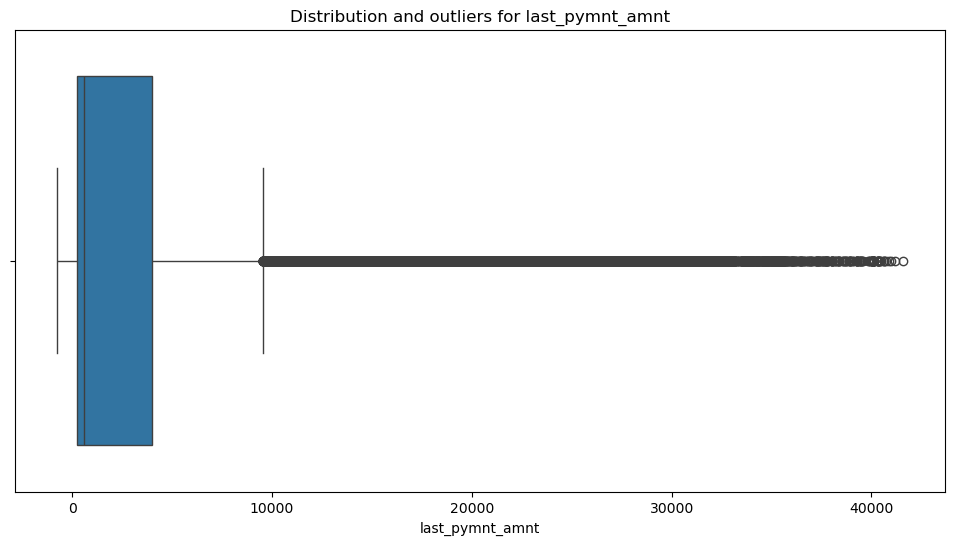

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

field_to_plot = "last_pymnt_amnt"

# Plotting variable distribution with outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_dropped[field_to_plot])
plt.title(f"Distribution and outliers for {field_to_plot}")
plt.show()


In [62]:
# Option 1 - Removing outliers
field_to_treat = "last_pymnt_amnt"

df_no_outliers = df_dropped[(z_scores[field_to_treat] < threshold)]
df_no_outliers.shape

(97293, 142)

In [64]:
# Option 2 - Transforming field affected by outliers
field_to_treat_log = f"{field_to_treat}_log"

df_dropped[field_to_treat_log] = np.log1p(df_dropped[field_to_treat])
print(f"Maximum value of z score after taking log: {max(np.abs(stats.zscore(df_dropped[field_to_treat_log].dropna())))}") # Added dropna() as some NAs returned (ideally to be fixed, for illustrative purposes only)

Maximum value of z score after taking log: 2.6174817119060676


C:\Users\acban\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


6\. Text data handling
----------------------------------------

In [68]:
df_dropped['url'].value_counts()[:5]

url
https://lendingclub.com/browse/loanDetail.action?loan_id=167338079    1
https://lendingclub.com/browse/loanDetail.action?loan_id=693399       1
https://lendingclub.com/browse/loanDetail.action?loan_id=119962746    1
https://lendingclub.com/browse/loanDetail.action?loan_id=161374059    1
https://lendingclub.com/browse/loanDetail.action?loan_id=74591293     1
Name: count, dtype: int64

In [72]:
import re

def extract_loan_id_from_url(mystring):
    keyword = '='
    before_keyword, keyword, after_keyword = mystring.partition(keyword)
    return after_keyword

df_dropped['loan_id_extracted'] = df_dropped['url'].apply(extract_loan_id_from_url)
df_dropped[['id','url','loan_id_extracted']][:5]

,id,url,loan_id_extracted
0,167338079,https://lendingclub.com/browse/loanDetail.acti...,167338079
1,71016917,https://lendingclub.com/browse/loanDetail.acti...,71016917
2,39589826,https://lendingclub.com/browse/loanDetail.acti...,39589826
3,134798709,https://lendingclub.com/browse/loanDetail.acti...,134798709
4,127097355,https://lendingclub.com/browse/loanDetail.acti...,127097355


Let's check how employment title is populated:

In [74]:
print("Number of unique titles:", df_dropped['emp_title'].value_counts().shape[0])
df_dropped['emp_title'].value_counts()[:10]

Number of unique titles: 40094


emp_title
Teacher             1709
Manager             1547
Owner                812
Registered Nurse     691
Driver               685
RN                   651
Supervisor           590
Sales                515
Office Manager       469
Project Manager      441
Name: count, dtype: int64

In [76]:
# Cleaning text data
df_dropped['emp_title_clean'] = df_dropped['emp_title'].str.lower().str.strip()
df_dropped['emp_title_clean'].value_counts()[:10]

emp_title_clean
teacher             2121
manager             2062
owner               1245
registered nurse    1019
driver              1008
supervisor           978
sales                765
rn                   758
office manager       670
truck driver         612
Name: count, dtype: int64

In [78]:
df_dropped['emp_title_manager'] = df_dropped['emp_title_clean'].str.contains("manager")
df_dropped['emp_title_manager'].value_counts()

emp_title_manager
False    77148
True     13898
Name: count, dtype: int64

In [80]:
selected_columns = df_dropped[["emp_title_manager", "emp_title_clean"]]
unique_combinations = selected_columns.drop_duplicates()
unique_combinations.head(10)

,emp_title_manager,emp_title_clean
0,False,cashier
1,False,abm
2,False,driver
3,NaN,NaN
4,False,shipping clerk
5,False,csr
6,False,cdc lll
7,False,snr scientist
9,False,pharmacist
10,False,billing specialist


In [82]:
ref_job_families = pd.read_csv(rf"{path_python_material}/data/1-raw/emp_title_mapping.csv")
ref_job_families.head()

print(f"Number of existing job families: {ref_job_families.Category.nunique()}")

Number of existing job families: 32


In [84]:
df_mapped = pd.merge(left = df_dropped
                     , right = ref_job_families
                     , left_on = "emp_title_clean"
                     , right_on= "Job Title"
                     , how = "left"
                    )


In [88]:
# Let's check if there are any duplicates in the reference file:
print(ref_job_families.shape)
print(ref_job_families.drop_duplicates().shape)

(91, 2)
(89, 2)


### Data export

In [100]:
df_mapped_deduped.to_csv(rf"{path_python_material}/data/2-intermediate/df_out_dsif2.csv"
                        , index = False)